Introduction:
Air quality and vehicle emissions are critical factors that impact the environment and public health. Poor air quality, characterized by high levels of pollutants such as ozone, nitrogen dioxide, and carbon monoxide, can lead to various respiratory and cardiovascular diseases. Vehicle emissions, particularly carbon dioxide (CO2) emissions, contribute significantly to greenhouse gas levels and climate change. Understanding the relationships between air quality, vehicle emissions, and fuel efficiency is crucial for developing effective strategies to mitigate their negative impacts.
Data science plays a vital role in analyzing and interpreting the vast amounts of data related to air quality and vehicle emissions. By applying statistical techniques and machine learning algorithms, data scientists can uncover patterns, trends, and relationships that can inform policy decisions and drive technological advancements. Through data-driven insights, we can identify the most influential factors affecting air quality and vehicle emissions, enabling targeted interventions and regulations to improve environmental sustainability and public well-being.

Hypotheses:
In this study, we hypothesize that there are significant relationships between air quality indicators (ozone, nitrogen dioxide, and carbon monoxide levels), vehicle fuel efficiency (measured by real-world miles per gallon), and vehicle emissions (particularly CO2 emissions). We expect to find correlations between these variables, with higher fuel efficiency associated with lower CO2 emissions and better air quality. Additionally, we hypothesize that certain vehicle characteristics, such as weight and horsepower, may have an impact on fuel efficiency and emissions.

In [47]:
# standard Python libraries for data science
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model

# Python libraries for analysis
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Python libraries for graphing and visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api
import statsmodels.formula.api as sm
import seaborn

Data Collection:
To conduct our analysis, we collected data from various sources. We obtained air quality data, including ozone, nitrogen dioxide, and carbon monoxide levels, from the National Ambient Air Quality Standards (NAAQS) database. Vehicle fuel efficiency and emissions data were gathered from the U.S. Environmental Protection Agency's (EPA) Fuel Economy database. We focused on data from 1980 to 2022 to capture long-term trends and changes in air quality and vehicle technologies.

In [30]:
# Read the ozone data and select specific columns
ozone_data = pd.read_csv('OzoneNational.csv')[['Year', 'Mean']]
ozone_data.rename(columns={'Mean': 'Ozone_Mean'}, inplace=True)

# Read the nitrogen dioxide data and select specific columns
no2_data = pd.read_csv('Nitrogen_DioxideNational.csv')[['Year', 'Mean']]
no2_data.rename(columns={'Mean': 'NO2_Mean'}, inplace=True)

# Read the carbon monoxide data and select specific columns
co_data = pd.read_csv('Carbon_MonoxideNational.csv')[['Year', 'Mean']]
co_data.rename(columns={'Mean': 'CO_Mean'}, inplace=True)

# Read the vehicle fuel efficiency and emissions data
vehicle_data = pd.read_csv('table_export.csv')

# Print the first few rows of each dataset to check the data
print("Ozone Data:")
print(ozone_data.head())
print("\nNitrogen Dioxide Data:")
print(no2_data.head())
print("\nCarbon Monoxide Data:")
print(co_data.head())
print("\nVehicle Fuel Efficiency and Emissions Data:")
print(vehicle_data.head())

Ozone Data:
   Year  Ozone_Mean
0  1980    0.093561
1  1981    0.091314
2  1982    0.089519
3  1983    0.096831
4  1984    0.088090

Nitrogen Dioxide Data:
   Year    NO2_Mean
0  1980  112.900000
1  1981  109.900000
2  1982  110.100000
3  1983   99.550000
4  1984   93.058333

Carbon Monoxide Data:
   Year   CO_Mean
0  1980  9.703125
1  1981  9.560937
2  1982  8.893750
3  1983  9.412500
4  1984  8.665625

Vehicle Fuel Efficiency and Emissions Data:
  Model Year Regulatory Class Vehicle Type Production Share  Real-World MPG  \
0       1975              All          All         1.000000        13.05970   
1       1975              Car      All Car         0.806646        13.45483   
2       1975              Car  Sedan/Wagon         0.805645        13.45833   
3       1975            Truck    All Truck         0.193354        11.63431   
4       1975            Truck       Pickup         0.131322        11.91476   

   Real-World MPG_City  Real-World MPG_Hwy  Real-World CO2 (g/mi)  \
0   

Data Processing:
During the data processing stage, we encountered missing values in some of the datasets. To address this issue, we employed various techniques, such as removing rows with missing values or imputing missing values based on statistical methods like mean imputation or regression imputation. We carefully considered the potential impact of missing values on our analysis and selected the most appropriate approach to ensure data integrity.
To combine the air quality and vehicle data, we decided to join the tables based on the "Year" column. This allowed us to align the data from different sources and create a comprehensive dataset for analysis. We performed necessary data cleaning and formatting to ensure consistency and compatibility across the merged dataset.

In [31]:
# Clean the vehicle data
vehicle_data_cleaned = vehicle_data[vehicle_data['Vehicle Type'] == 'All']
vehicle_data_cleaned = vehicle_data_cleaned[['Model Year', 'Real-World MPG', 'Real-World CO2 (g/mi)', 'Weight (lbs)', 'Horsepower (HP)']]
vehicle_data_cleaned.rename(columns={'Model Year': 'Year'}, inplace=True)

# Print the first few rows of the cleaned vehicle data
print("Cleaned Vehicle Fuel Efficiency and Emissions Data:")
print(vehicle_data_cleaned.head())

Cleaned Vehicle Fuel Efficiency and Emissions Data:
    Year  Real-World MPG  Real-World CO2 (g/mi)  Weight (lbs)  Horsepower (HP)
0   1975        13.05970              680.59612      4060.399         137.3346
8   1976        14.22136              625.02238      4079.198         135.0839
16  1977        15.06743              589.99880      3981.818         135.9847
24  1978        15.83777              561.62442      3715.238         129.0248
32  1979        15.91271              559.69495      3655.465         123.5922


In [32]:
# Filter out non-numeric 'Year' values
vehicle_data_cleaned = vehicle_data_cleaned[pd.to_numeric(vehicle_data_cleaned['Year'], errors='coerce').notnull()]

# Convert 'Year' column in vehicle_data_cleaned to int64
vehicle_data_cleaned['Year'] = vehicle_data_cleaned['Year'].astype(int)

# Merge the data based on the 'Year' column
merged_data = pd.merge(ozone_data, no2_data, on='Year', how='outer')
merged_data = pd.merge(merged_data, co_data, on='Year', how='outer')
merged_data = pd.merge(merged_data, vehicle_data_cleaned, on='Year', how='outer')

# Drop rows with NaN values in any column, since the ranges for the year is different in the tables
merged_data.dropna(inplace=True)

# Sort the merged data by 'Year'
merged_data.sort_values('Year', inplace=True)

# Reset the index of the merged data
merged_data.reset_index(drop=True, inplace=True)

# Print the first few rows of the merged data
print("Merged Data:")
print(merged_data.head())

# Get basic information about the merged data
print("\nMerged Data Info:")
print(merged_data.info())

Merged Data:
   Year  Ozone_Mean    NO2_Mean   CO_Mean  Real-World MPG  \
0  1980    0.093561  112.900000  9.703125        19.16493   
1  1981    0.091314  109.900000  9.560937        20.52057   
2  1982    0.089519  110.100000  8.893750        21.07205   
3  1983    0.096831   99.550000  9.412500        20.95239   
4  1984    0.088090   93.058333  8.665625        21.00023   

   Real-World CO2 (g/mi)  Weight (lbs)  Horsepower (HP)  
0              465.93524      3227.876         103.8276  
1              436.03635      3201.759         102.1236  
2              424.63837      3201.843         102.9528  
3              425.53494      3257.340         106.9483  
4              424.02812      3261.576         108.5963  

Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   43 non-null     int

In [33]:
# Exploratory Data Analysis (EDA)
print("\nExploratory Data Analysis (EDA):")

# Descriptive statistics
print("\nDescriptive Statistics:")
print(merged_data.describe())

# Correlation matrix
print("\nCorrelation Matrix:")
print(merged_data.corr())


Exploratory Data Analysis (EDA):

Descriptive Statistics:
              Year  Ozone_Mean    NO2_Mean    CO_Mean  Real-World MPG  \
count    43.000000   43.000000   43.000000  43.000000       43.000000   
mean   2001.000000    0.080362   69.802384   4.273001       21.766180   
std      12.556539    0.009760   23.518444   2.813962        2.003750   
min    1980.000000    0.065223   39.990000   1.200000       19.164930   
25%    1990.500000    0.070807   47.988333   1.673437       20.263950   
50%    2001.000000    0.082598   66.375000   3.403125       21.072050   
75%    2011.500000    0.087996   93.754167   6.665625       23.078995   
max    2022.000000    0.101331  112.900000   9.703125       25.993490   

       Real-World CO2 (g/mi)  Weight (lbs)  Horsepower (HP)  
count              43.000000     43.000000        43.000000  
mean              411.531868   3765.739837       180.883893  
std                36.573002    357.543218        49.539183  
min               337.081030   3201

<Figure size 1000x600 with 0 Axes>

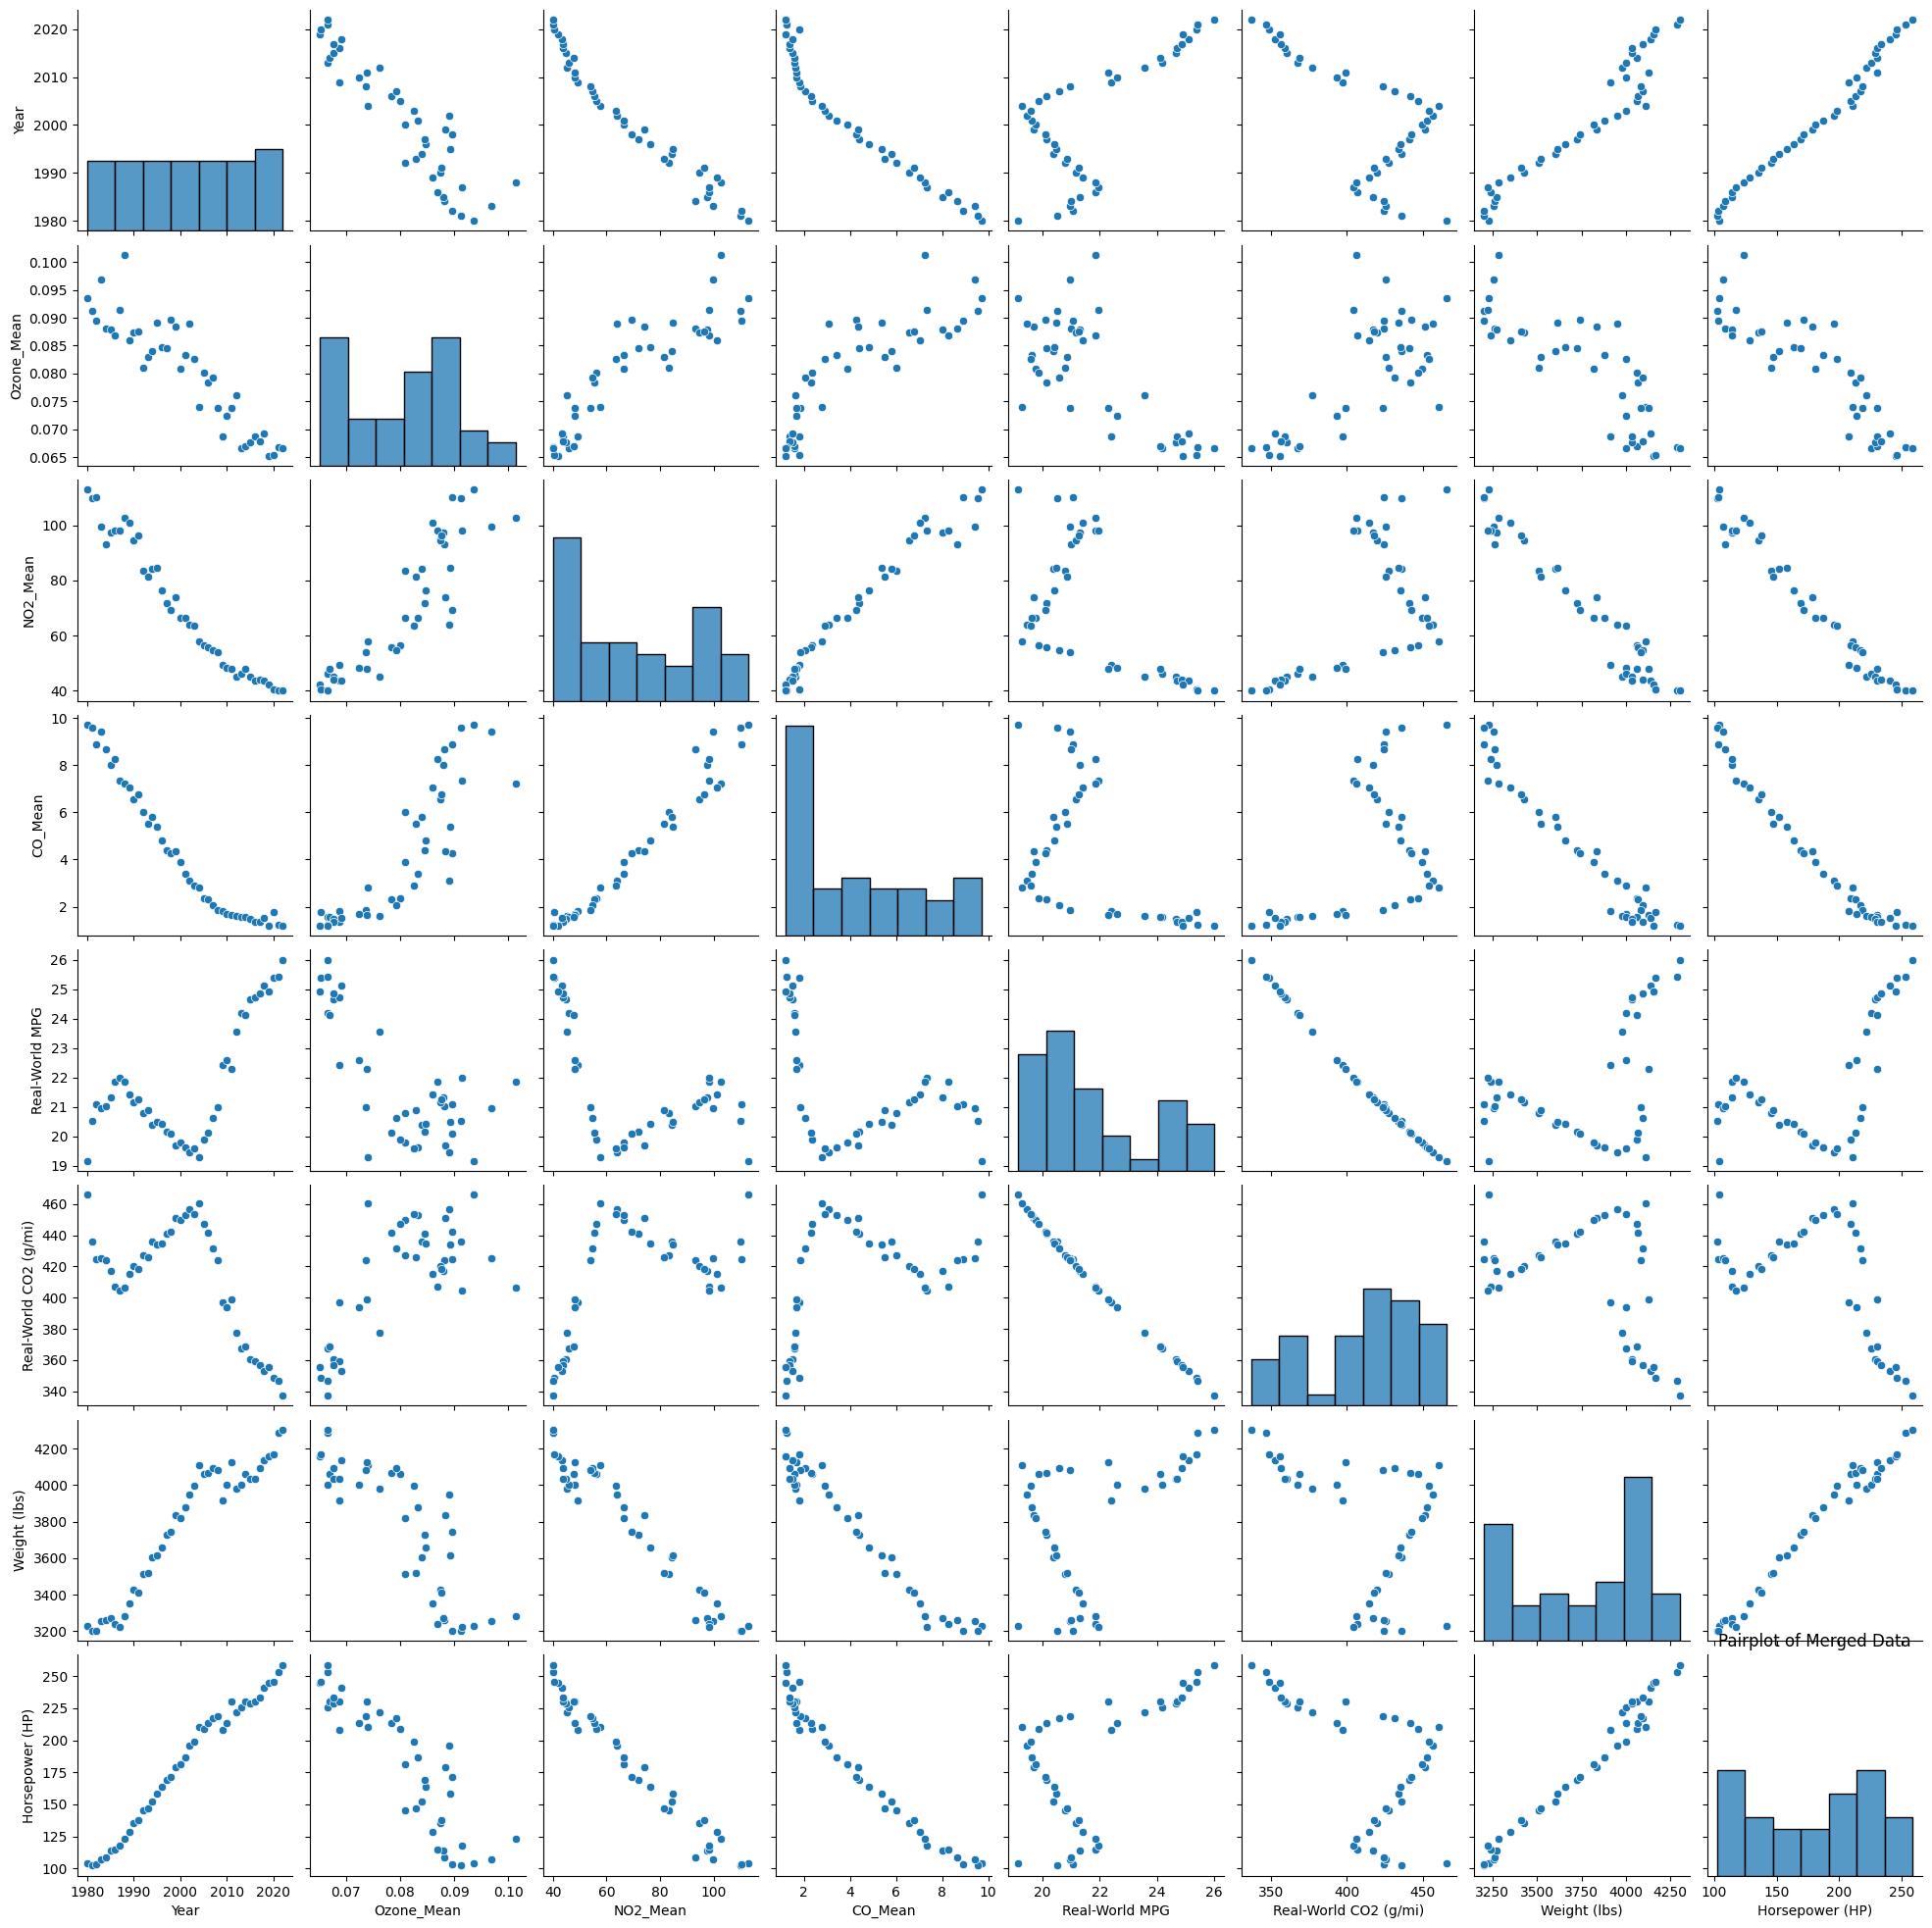

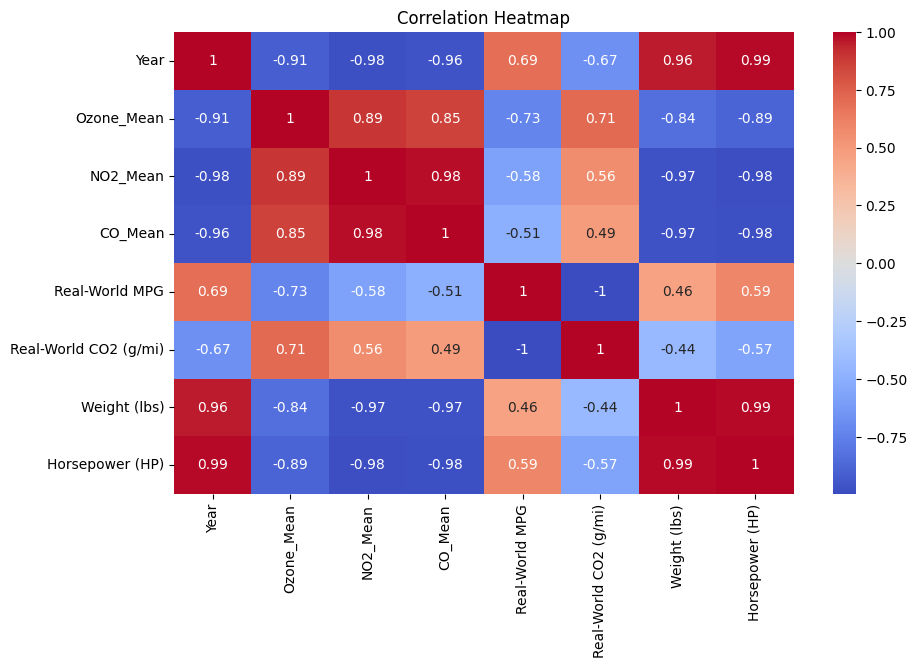

In [34]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.pairplot(merged_data)
plt.title("Pairplot of Merged Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

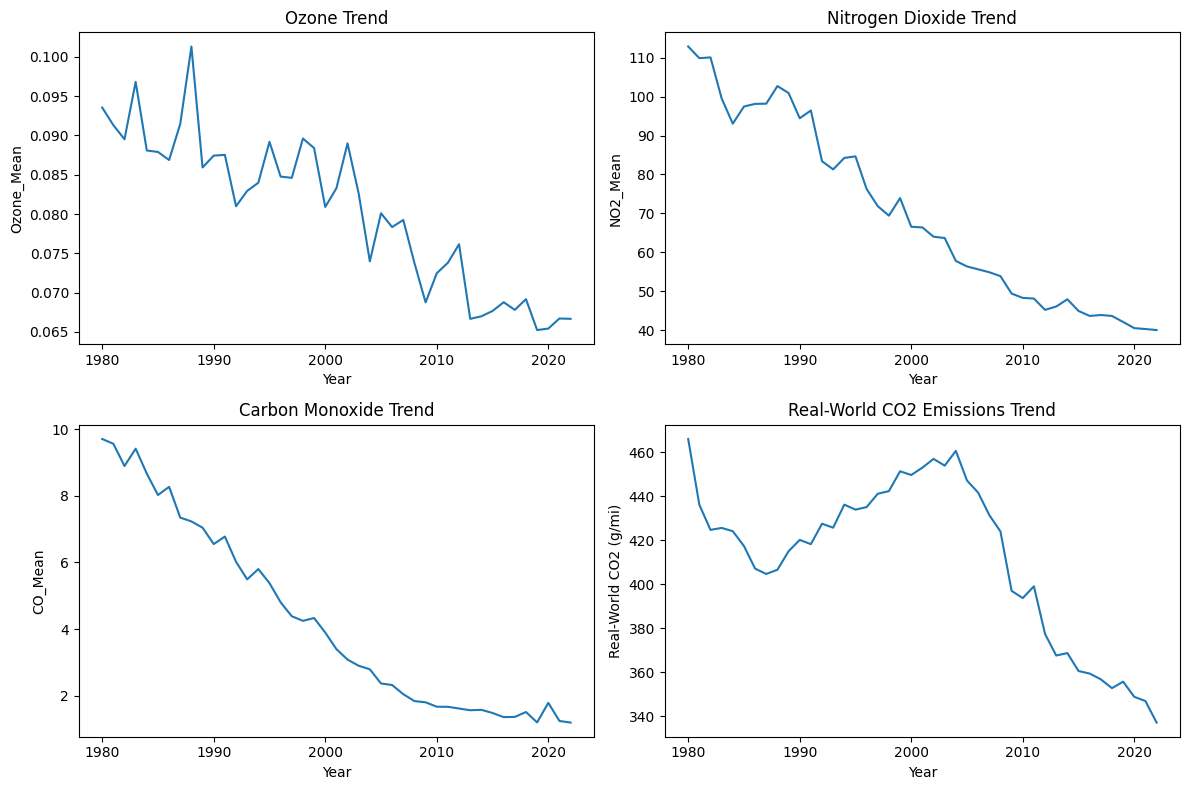

In [35]:
# Trend analysis
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.lineplot(data=merged_data, x='Year', y='Ozone_Mean')
plt.title("Ozone Trend")

plt.subplot(2, 2, 2)
sns.lineplot(data=merged_data, x='Year', y='NO2_Mean')
plt.title("Nitrogen Dioxide Trend")

plt.subplot(2, 2, 3)
sns.lineplot(data=merged_data, x='Year', y='CO_Mean')
plt.title("Carbon Monoxide Trend")

plt.subplot(2, 2, 4)
sns.lineplot(data=merged_data, x='Year', y='Real-World CO2 (g/mi)')
plt.title("Real-World CO2 Emissions Trend")

plt.tight_layout()
plt.show()

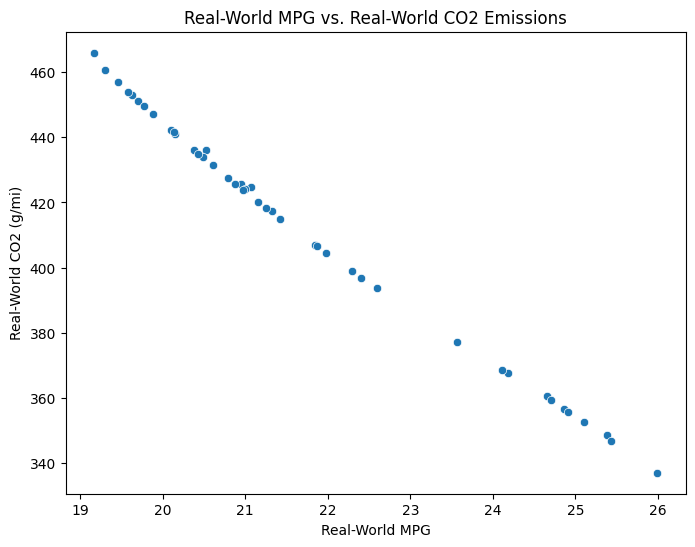

In [36]:
# Scatter plot of Real-World MPG vs. Real-World CO2 Emissions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Real-World MPG', y='Real-World CO2 (g/mi)')
plt.title("Real-World MPG vs. Real-World CO2 Emissions")
plt.show()

In [37]:
# Data Preprocessing
print("\nData Preprocessing:")

# Normalize the data using MinMaxScaler
scaler_minmax = MinMaxScaler()
merged_data_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(merged_data), columns=merged_data.columns)
print("\nNormalized Data (MinMaxScaler):")
print(merged_data_scaled_minmax.head())

# Standardize the data using StandardScaler
scaler_standard = StandardScaler()
merged_data_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(merged_data), columns=merged_data.columns)
print("\nStandardized Data (StandardScaler):")
print(merged_data_scaled_standard.head())

# Split the data into training and testing sets
X = merged_data_scaled_minmax.drop('Real-World CO2 (g/mi)', axis=1)
y = merged_data_scaled_minmax['Real-World CO2 (g/mi)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Data Preprocessing:

Normalized Data (MinMaxScaler):
       Year  Ozone_Mean  NO2_Mean   CO_Mean  Real-World MPG  \
0  0.000000    0.784803  1.000000  1.000000        0.000000   
1  0.023810    0.722593  0.958853  0.983278        0.198525   
2  0.047619    0.672868  0.961596  0.904814        0.279286   
3  0.071429    0.875372  0.816898  0.965821        0.261762   
4  0.095238    0.633283  0.727861  0.877986        0.268768   

   Real-World CO2 (g/mi)  Weight (lbs)  Horsepower (HP)  
0               1.000000      0.023708         0.010876  
1               0.767963      0.000000         0.000000  
2               0.679507      0.000076         0.005292  
3               0.686465      0.050454         0.030794  
4               0.674771      0.054300         0.041313  

Standardized Data (StandardScaler):
       Year  Ozone_Mean  NO2_Mean   CO_Mean  Real-World MPG  \
0 -1.692228    1.368287  1.854190  1.952545       -1.313555   
1 -1.611646    1.135422  1.725121  1.901418       -0.628

In [38]:
# Analysis and Modeling
print("\nAnalysis and Modeling:")

# Linear Regression
print("\nLinear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
print("Linear Regression R-squared:", lr_r2)
print("Linear Regression Mean Squared Error:", lr_mse)


Analysis and Modeling:

Linear Regression:
Linear Regression R-squared: 0.9989899932937648
Linear Regression Mean Squared Error: 9.27740123582989e-05


In [48]:
# Ridge Regression
print("\nRidge Regression:")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Ridge Regression R-squared:", ridge_r2)
print("Ridge Regression Mean Squared Error:", ridge_mse)


Ridge Regression:
Ridge Regression R-squared: 0.8819878012532094
Ridge Regression Mean Squared Error: 0.010839992563787197


In [39]:
# Random Forest Regression
print("\nRandom Forest Regression:")
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print("Random Forest Regression R-squared:", rf_r2)
print("Random Forest Regression Mean Squared Error:", rf_mse)


Random Forest Regression:
Random Forest Regression R-squared: 0.9899002627587682
Random Forest Regression Mean Squared Error: 0.0009277098279141618


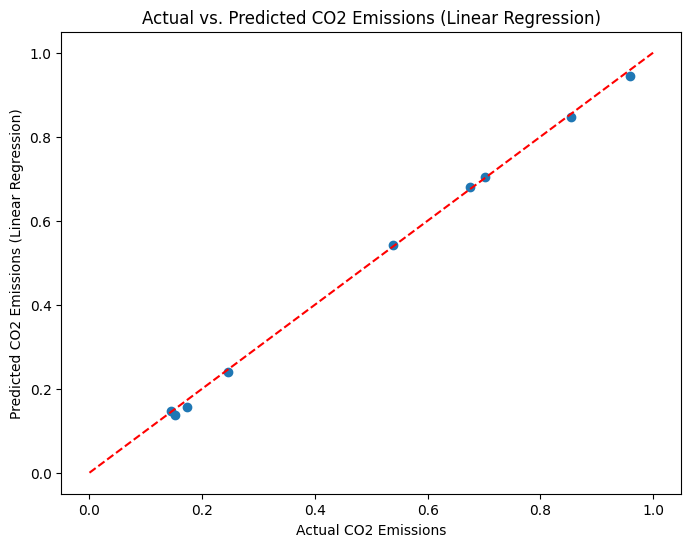

In [40]:
# Visualization and Communication
print("\nVisualization and Communication:")

# Actual vs. Predicted CO2 Emissions (Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_y_pred)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions (Linear Regression)")
plt.title("Actual vs. Predicted CO2 Emissions (Linear Regression)")
plt.show()

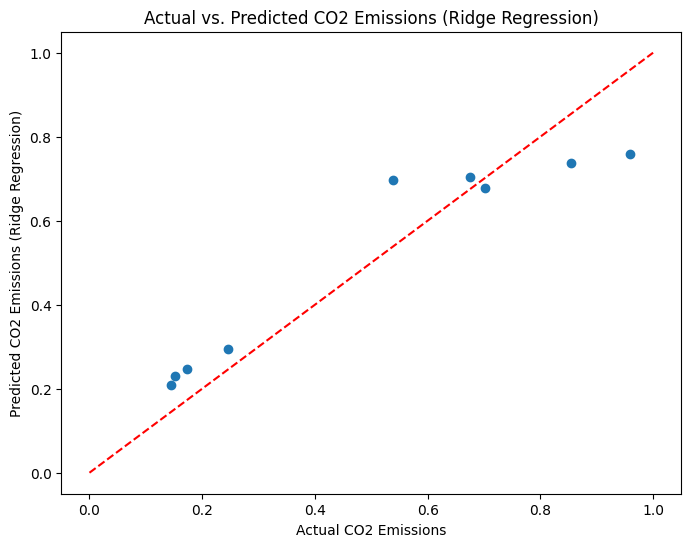

In [49]:
# Actual vs. Predicted CO2 Emissions (Ridge Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_y_pred)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions (Ridge Regression)")
plt.title("Actual vs. Predicted CO2 Emissions (Ridge Regression)")
plt.show()

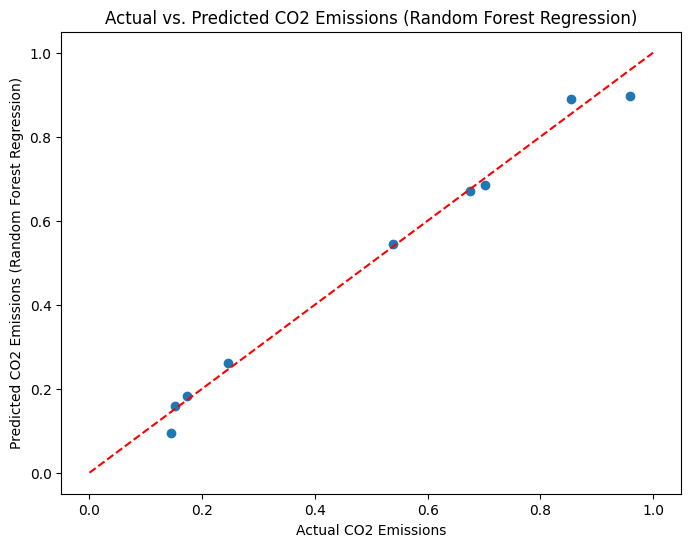

In [41]:
# Actual vs. Predicted CO2 Emissions (Random Forest Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions (Random Forest Regression)")
plt.title("Actual vs. Predicted CO2 Emissions (Random Forest Regression)")
plt.show()

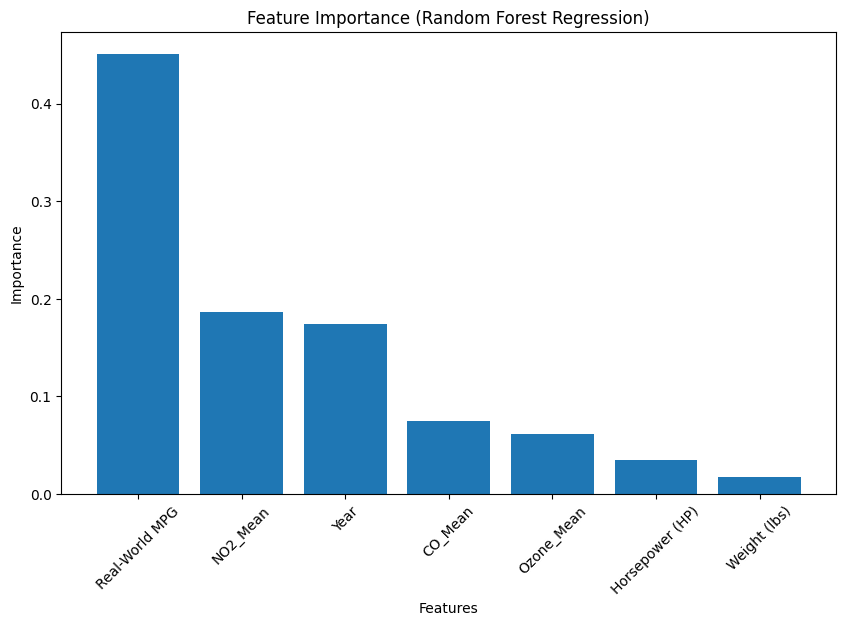

In [42]:
# Feature Importance (Random Forest Regression)
importances = rf_best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest Regression)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

Based on these insights, we recommend the following policy decisions:

1. Implement stricter fuel efficiency standards for vehicles to accelerate the adoption of fuel-efficient technologies and reduce CO2 emissions.

2. Encourage the transition to electric vehicles and invest in the development of charging infrastructure to promote zero-emission transportation.

3. Collaborate with manufacturers to develop lightweight materials and design optimization techniques to reduce vehicle weight without compromising safety.

4. Promote public awareness campaigns to educate consumers about the environmental benefits of fuel-efficient and low-emission vehicles.

5. Invest in research and development of advanced emission control technologies to further reduce air pollutants, particularly ozone precursors.

By implementing these policy decisions and continuing to monitor and analyze air quality and vehicle emissions data, we can work towards a cleaner, more sustainable transportation sector that benefits both the environment and public health.
